In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

# Avoiding warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the data
df = pd.read_csv("695train.csv")
display(df.head())

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# Checking statistical information
display(df.describe())

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
# Checking datatype information
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


None

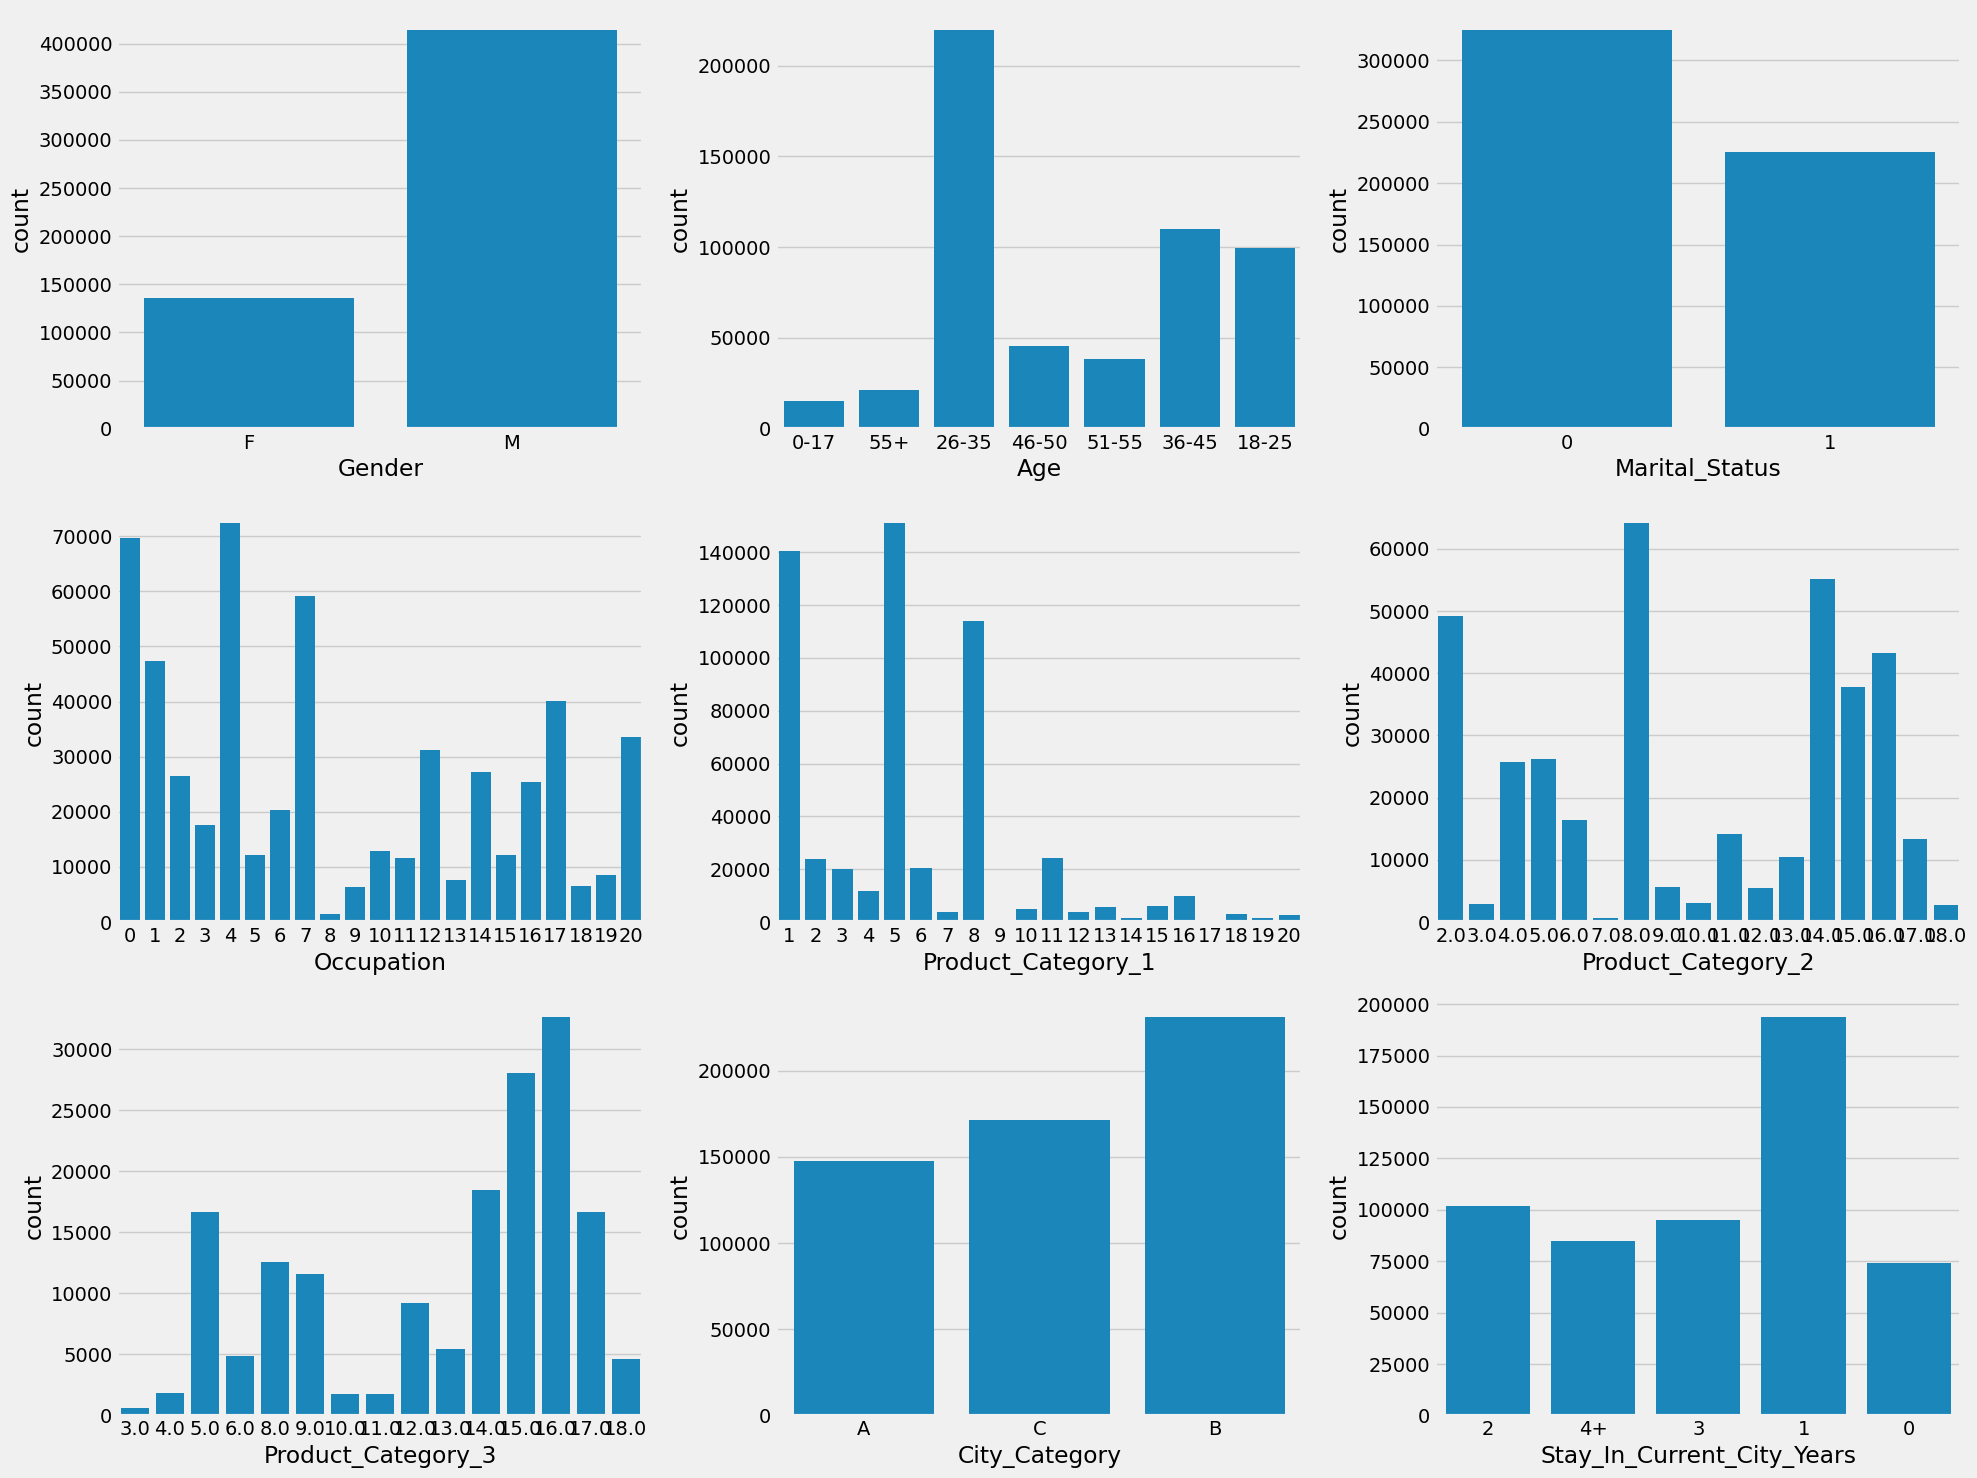

In [6]:
# Plotting the distribution of various variables
plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
sns.countplot(data=df, x='Gender', ax=axes[0,0])
sns.countplot(data=df, x='Age', ax=axes[0,1])
sns.countplot(data=df, x='Marital_Status', ax=axes[0,2])
sns.countplot(data=df, x='Occupation', ax=axes[1,0])
sns.countplot(data=df, x='Product_Category_1', ax=axes[1,1])
sns.countplot(data=df, x='Product_Category_2', ax=axes[1,2])
sns.countplot(data=df, x='Product_Category_3', ax=axes[2,0])
sns.countplot(data=df, x='City_Category', ax=axes[2,1])
sns.countplot(data=df, x='Stay_In_Current_City_Years', ax=axes[2,2])

plt.tight_layout()
plt.show()

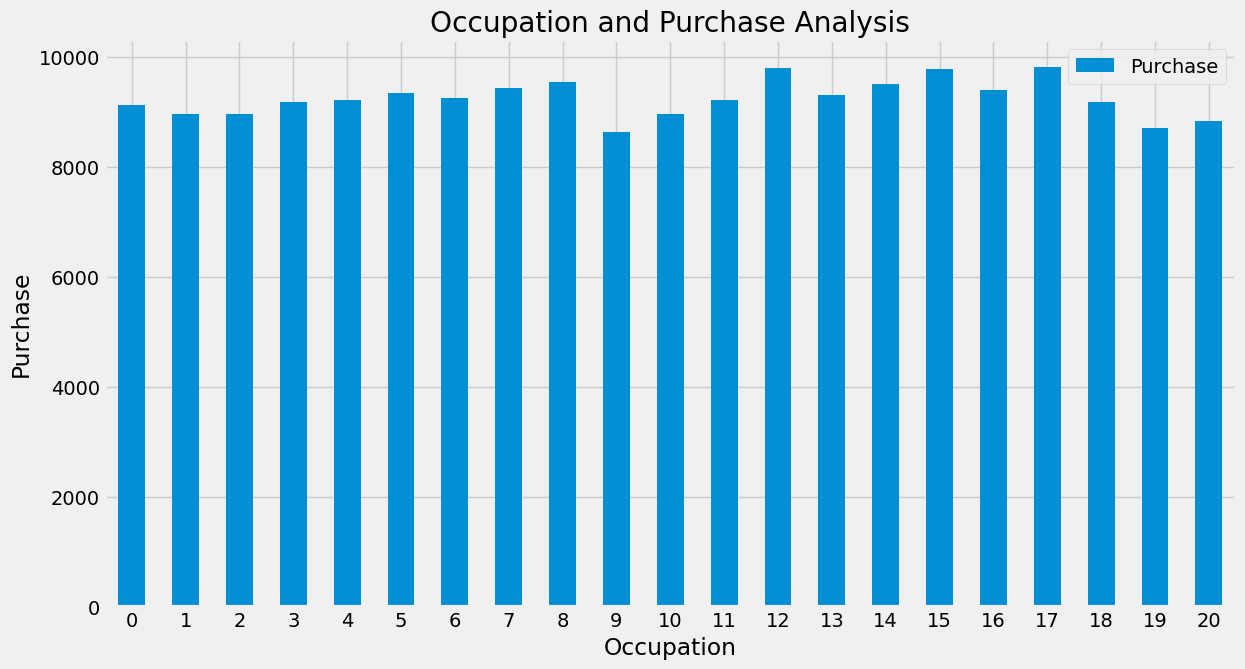

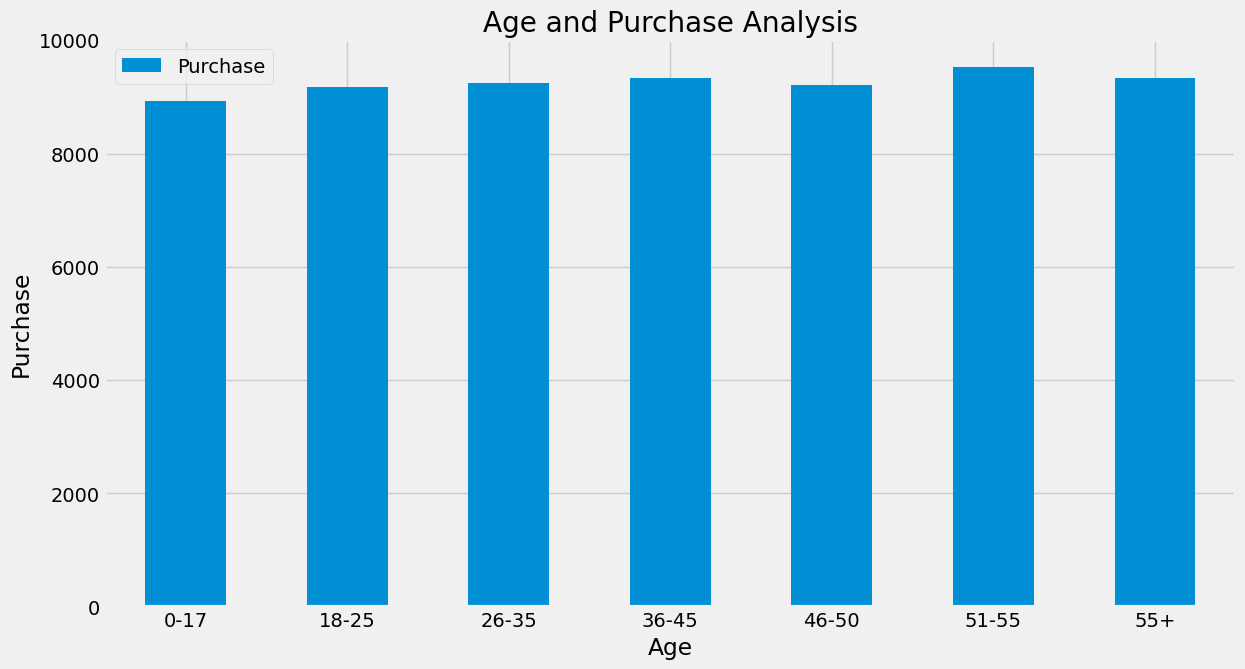

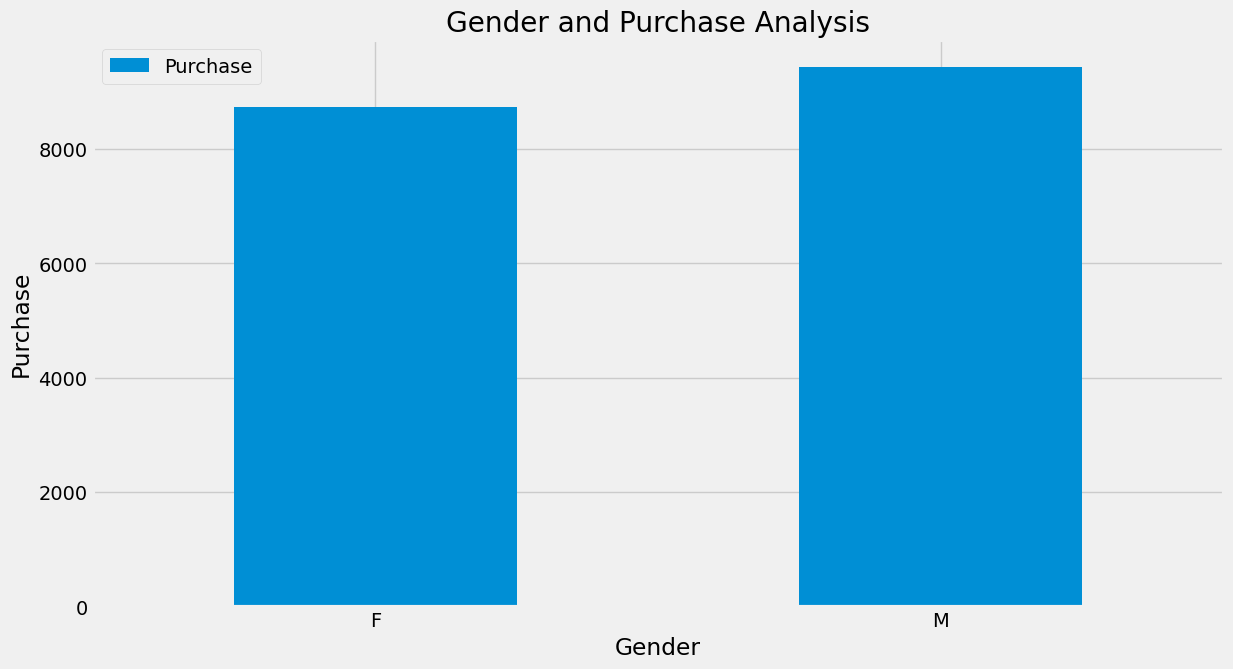

In [7]:
# Bivariate analysis
variables = ['Occupation', 'Age', 'Gender']
for var in variables:
    plot_data = df.pivot_table(index=var, values='Purchase', aggfunc=np.mean)
    plot_data.plot(kind='bar', figsize=(13, 7))
    plt.xlabel(var)
    plt.ylabel("Purchase")
    plt.title(f"{var} and Purchase Analysis")
    plt.xticks(rotation=0)
    plt.show()

In [8]:
# Handling missing values
df['Product_Category_2'] = df['Product_Category_2'].fillna(-2.0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(-2.0).astype("float32")

In [19]:
# Encoding gender
gender_dict = {'F':0, 'M':1}
df['Gender'] = df['Gender'].map(gender_dict)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,NaN,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,NaN,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,NaN,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,NaN,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,NaN,6,16,2,4,0,8,-2.0,-2.0,7969


In [20]:
# Label encoding
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,NaN,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,NaN,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,NaN,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,NaN,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,NaN,6,16,2,4,0,8,-2.0,-2.0,7969


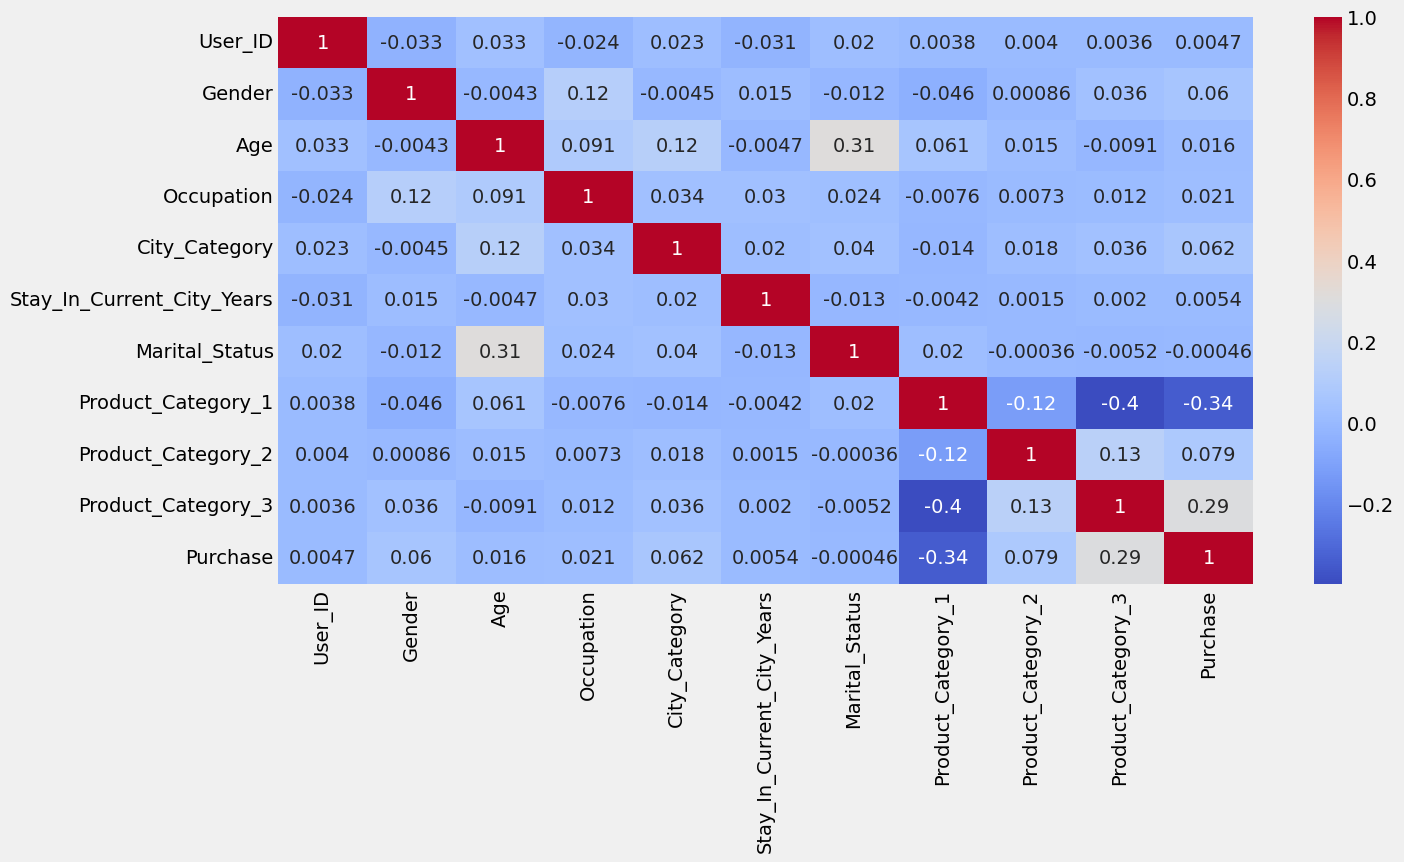

In [11]:
# Filter the dataframe to include only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [12]:
# Splitting data
X = df.drop(columns=['Product_ID', 'Purchase'])
y = df['Purchase']

In [13]:
# Model training function
def train(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    model.fit(x_train, y_train)
    
    #predicting the result
    pred = model.predict(x_test)
    # cross validation 
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))

In [14]:
model = LinearRegression()

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
train(model, X_scaled, y)

Results
MSE: 4617.879586703179
CV Score: 4625.213027257659


Results
MSE: 3496.8896275479797
CV Score: 3467.8698298680606


<Axes: title={'center': 'Feature Importance'}>

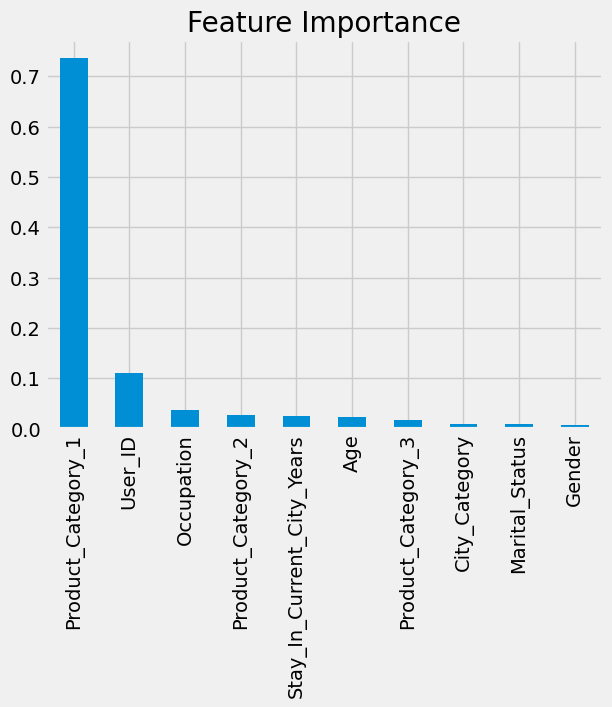

In [16]:
# DecisionTree
model = DecisionTreeRegressor()
train(model, X_scaled, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

Results
MSE: 2991.5094822732417
CV Score: 2988.2833451799315


<Axes: title={'center': 'Feature Importance'}>

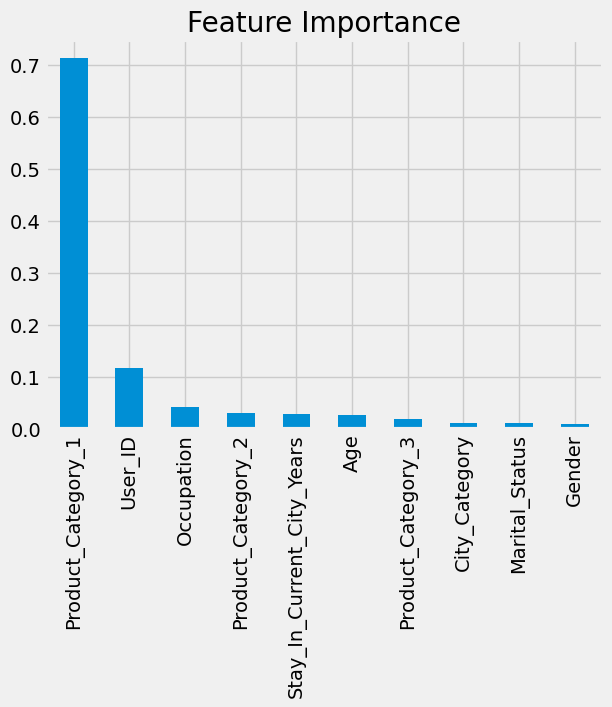

In [17]:
# RandomForest
model = RandomForestRegressor(n_jobs=-1)
train(model, X_scaled, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

Results
MSE: 3174.4304477431397
CV Score: 3168.3063590854863


<Axes: title={'center': 'Feature Importance'}>

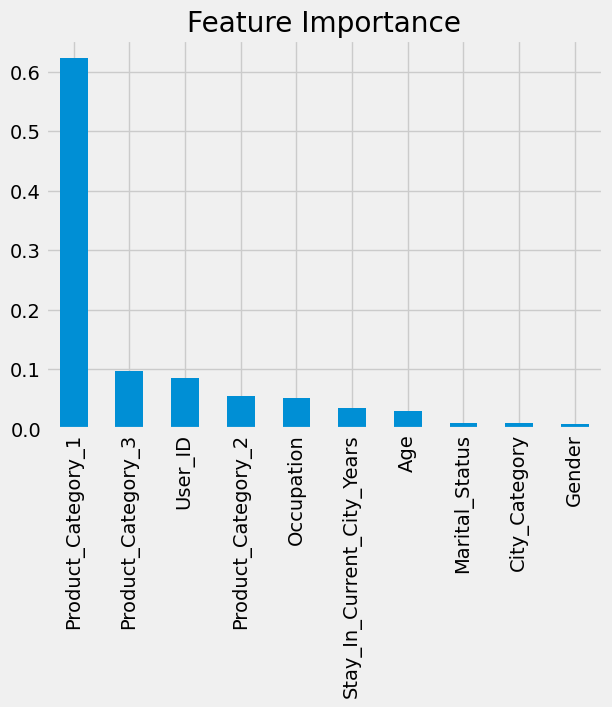

In [18]:
# ExtraTreesRegressor
model = ExtraTreesRegressor(n_jobs=-1)
train(model, X_scaled, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')